# GPU 설정

- 런타임 -> 런타임 유형변경 -> None을 GPU 로 설정 변경
- GPU 를 사용하면 병렬 연산이 가능하여 머신러닝을 할 때 학습 속도를 높일 수 있다.

# 구글 드라이브 마운트

- 왼쪽 폴더 모양을 누르면 작업 공간을 보실 수 있습니다.
- drive 를 통해서 구글 드라이브 공간을 현재 작업공간으로 불러올 수 있습니다.

In [1]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


# ========= 머신러닝 실습 ==========
- mnist 데이터를 이용해서 지도학습(분류)를 해보겠습니다.
- sklearn (사이킷런) 라이브러리는 머신러닝 또는 그와 관련된 도구들을 제공해주는 라이브러리 입니다.
- mnist 데이터는 오픈된 손글씨 데이터셋 입니다. 숫자들을 손글씨로 적은 데이터입니다.

### 1. 데이터 가져오기

In [2]:
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784')  # 784 = 28*28

In [3]:
# key 가져오기
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

### 2. 데이터 전처리

- X 데이터 전처리 : 리스트 형을 (28,28,1) 형태로 바꿔줍니다

In [4]:
X = mnist['data']
X = X.reshape(-1,28,28,1)
X = X / 256
X.shape

(70000, 28, 28, 1)

- y 데이터 전처리 : 문자형을 정수형으로 바꿔줍니다.

In [5]:
y = mnist['target']
y = y.astype('int')
y.shape, y.dtype

((70000,), dtype('int64'))

- 데이터 확인 (idx 값을 바꿔가면서 데이터 셋을 시각화해 봅시다.)

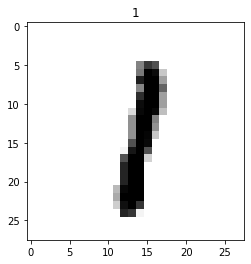

In [6]:
import matplotlib.pyplot as plt
# matplotlib 은 데이터를 시각화 할 수 있도록 도와주는 라이브러리

idx = 1200

plt.imshow(X[idx].reshape(28,28), cmap = 'binary')
plt.title(y[idx])
plt.show()


- 데이터 분할작업
- 보통은 데이터를 train_set (문제집), validation_set (모의고사), test_set (수능) 세개로 나누어 학습 진행을 한다.
- 이 실습에서는 test_set 없이 2개로만 데이터를 나누어 진행

### 3. Train_set , Validation_set 나누기

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.33,   # 모의고사 데이터 비율
                                                    random_state=42   # 랜덤 시드 설정
                                                    )


In [8]:
print('X.shape : ', X.shape)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_val.shape : ', X_val.shape)
print('y_val.shape : ', y_val.shape)

X.shape :  (70000, 28, 28, 1)
X_train.shape :  (46900, 28, 28, 1)
y_train.shape :  (46900,)
X_val.shape :  (23100, 28, 28, 1)
y_val.shape :  (23100,)


In [9]:
# sklearn : 머신러닝 관련 라이브러리
# tensorflow : 딥러닝 관련 라이브러리
# matplotlib : 시각화 관련 라이브러리
# pandas : 엑셀 처럼 테이블 구조 데이터를 다루는 라이브러리
# numpy : 수학 관련 라이브러리

### 4. 모델 만들기

In [10]:
from tensorflow import keras
# tensorflow 는 딥러닝 관련 도구들을 지원해주는 라이브러리

- 모델 생성

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape = (28,28,1)),
    keras.layers.Conv2D(filters = 64, kernel_size = 7, activation = 'relu'),
    keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'),
    keras.layers.GlobalAvgPool2D(),
    keras.layers.Dense(10, 
                       activation = 'softmax'  # 출력 되는 확률 값들의 합이 1이 되록 해주는 활성함수
                       )
])

- 모델 정보 확인

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 64)        3200      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 256)       295168    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
Total params: 374,794
Trainable params: 374,794
Non-trainable params: 0
_________________________________________________________________


- 모델 시각화

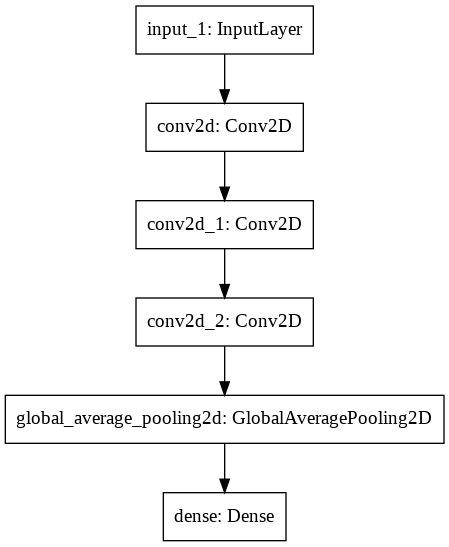

In [13]:
keras.utils.plot_model(model)

- 모델 파라미터(가중치) 확인

In [14]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(7, 7, 1, 64) dtype=float32, numpy=
 array([[[[ 0.0057626 ,  0.02809845, -0.01151366, ..., -0.00553503,
           -0.04264975, -0.00590405]],
 
         [[-0.0149793 ,  0.04330171,  0.0380152 , ..., -0.02419765,
            0.00409271, -0.01163017]],
 
         [[ 0.04180497,  0.01123019,  0.01499962, ..., -0.04083383,
            0.0236869 ,  0.00825252]],
 
         ...,
 
         [[ 0.00449616, -0.02305747,  0.02588492, ..., -0.04191915,
            0.02406594, -0.01790734]],
 
         [[-0.01520766,  0.00039447, -0.02275315, ..., -0.01188286,
           -0.02697508,  0.0339375 ]],
 
         [[ 0.02509489, -0.00218369, -0.04242129, ...,  0.01512982,
           -0.01336056,  0.00141956]]],
 
 
        [[[-0.01935599, -0.03463501,  0.02511017, ..., -0.03681443,
           -0.0252267 ,  0.00997012]],
 
         [[-0.0184751 , -0.01233839, -0.00847691, ..., -0.03780008,
           -0.02930838, -0.03968097]],
 
         [[ 0.02651055, -0.01306312

### 5. 모델 훈련

- 훈련 하이퍼파라미터 (옵션 값 지정)

In [15]:
model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              )

- 훈련 시작

In [16]:
r = model.fit(x = X_train,
              y = y_train,
              batch_size = 64,
              epochs = 200,
              validation_data = (X_val, y_val),      # validation set
              callbacks = [keras.callbacks.EarlyStopping(patience = 10,     # Validation loss 값이 10번이상 좋아지지 않으면 훈련을 종료함
                                                        restore_best_weights= True)]  # Validation loss 값이 가장 낮았던 모델을 복원
)

Epoch 1/200
733/733 [==============================] - 51s 29ms/step - loss: 2.2883 - accuracy: 0.1259 - val_loss: 2.2685 - val_accuracy: 0.1628
Epoch 2/200
733/733 [==============================] - 21s 28ms/step - loss: 2.2362 - accuracy: 0.2046 - val_loss: 2.1891 - val_accuracy: 0.2523
Epoch 3/200
733/733 [==============================] - 21s 28ms/step - loss: 2.0751 - accuracy: 0.2689 - val_loss: 1.9391 - val_accuracy: 0.3510
Epoch 4/200
733/733 [==============================] - 21s 28ms/step - loss: 1.7844 - accuracy: 0.3928 - val_loss: 1.5613 - val_accuracy: 0.5057
Epoch 5/200
733/733 [==============================] - 20s 28ms/step - loss: 1.2987 - accuracy: 0.5980 - val_loss: 1.1320 - val_accuracy: 0.5969
Epoch 6/200
733/733 [==============================] - 21s 28ms/step - loss: 0.8525 - accuracy: 0.7517 - val_loss: 0.7106 - val_accuracy: 0.8050
Epoch 7/200
733/733 [==============================] - 21s 28ms/step - loss: 0.5884 - accuracy: 0.8363 - val_loss: 0.4707 - val_ac

### 6. 훈련 결과 확인 (1) : Loss, Accuracy

- Loss 훈련 결과 시각화

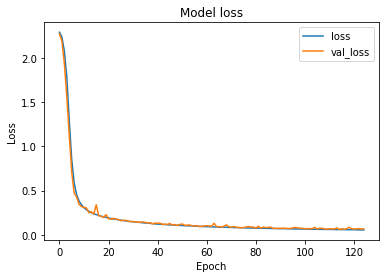

In [17]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Accuracy 훈련 결과 시각화

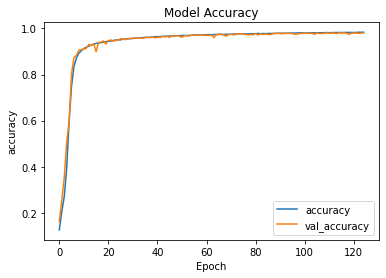

In [18]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 7. 훈련 결과 확인 (2) : 샘플

- 예측 결과 샘플로 확인해보기

In [19]:
idx_list = [10,30,52,160]

# 예측은 확률로 나옵니다.
y_prob = model.predict(X_val[idx_list])    
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.01, 0.13, 0.01, 0.  , 0.  , 0.01, 0.85, 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.93, 0.01]],
      dtype=float32)

In [20]:
# 확률이 가장 큰 인덱스를 추출합니다.

y_pred = y_prob.argmax(axis = 1)   
y_pred

array([3, 7, 6, 8])

In [21]:
# 실제 y 값을 가져옵니다.

y_real = y_val[idx_list]   
y_real

array([3, 7, 6, 8])

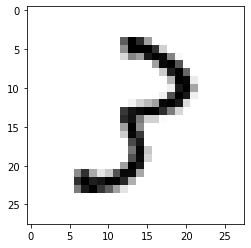

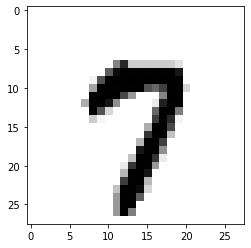

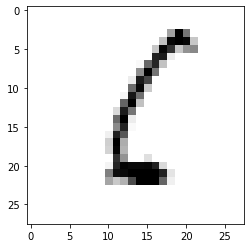

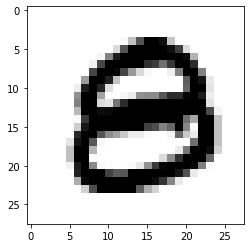

In [22]:
# 예측한 데이터의 사진들을 확인해 봅시다.

for i in idx_list :
    plt.imshow(X_val[i].reshape(28,28), cmap = 'binary')
    plt.show()

- 예측이 틀린 데이터 확인하기

### 8. 훈련 결과 확인 (3) : 예측이 틀린 데이터들 확인하기

In [23]:
# 모든 Validation set 예측 확률 추출
y_prob = model.predict(X_val)

# 확률이 가장 큰 idx 값을 가져옴
y_pred = y_prob.argmax(axis = 1)

In [24]:
import numpy as np

# 예측과 실제가 다른 인덱스 목록
false_idx_list = np.where(y_pred != y_val)[0]
print(false_idx_list)

[  154   241   256   349   385   599   605   672   686   699   755   777
   789   830   840   852   858   903   940  1043  1106  1108  1111  1214
  1220  1291  1342  1364  1495  1516  1528  1596  1611  1639  1716  1743
  1788  1864  1873  1882  2023  2025  2049  2092  2116  2139  2178  2183
  2209  2211  2223  2299  2318  2387  2467  2602  2622  2625  2845  2857
  2934  2972  2993  2996  3008  3174  3207  3234  3295  3297  3388  3390
  3403  3477  3481  3503  3712  3715  3732  3760  3784  3827  4008  4228
  4280  4395  4400  4453  4574  4625  4704  4755  4771  4900  4925  4927
  4944  4954  4980  5023  5052  5102  5112  5160  5179  5207  5210  5235
  5346  5482  5515  5529  5560  5592  5596  5645  5770  5772  5789  5807
  5870  5948  5980  6015  6190  6205  6249  6282  6284  6294  6321  6367
  6399  6401  6519  6541  6662  6829  6907  6945  7082  7094  7168  7195
  7246  7257  7289  7321  7368  7388  7400  7477  7619  7633  7893  7909
  7929  7962  8040  8059  8081  8085  8136  8143  8

========== [idx : 154] ==========
[0.21 0.   0.   0.   0.   0.   0.79 0.   0.   0.  ]


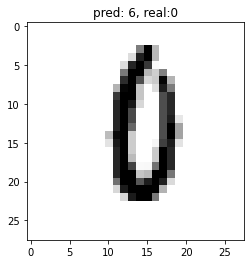

========== [idx : 241] ==========
[0.03 0.04 0.   0.   0.6  0.   0.   0.   0.   0.33]


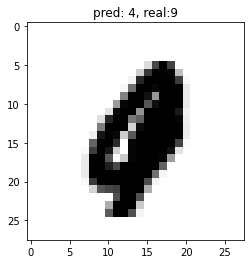

========== [idx : 256] ==========
[0.   0.04 0.01 0.   0.   0.   0.   0.72 0.   0.22]


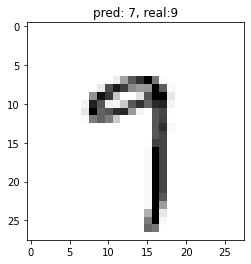

========== [idx : 349] ==========
[0.54 0.   0.   0.   0.01 0.   0.45 0.   0.   0.  ]


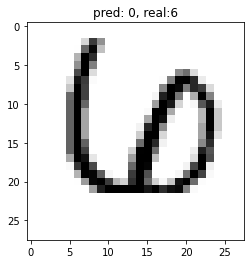

========== [idx : 385] ==========
[0.   0.   0.14 0.   0.01 0.03 0.   0.79 0.01 0.01]


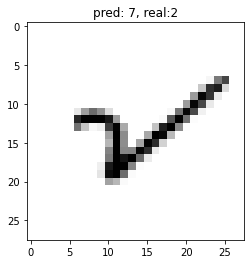

========== [idx : 599] ==========
[0.45 0.   0.2  0.   0.   0.03 0.   0.   0.28 0.04]


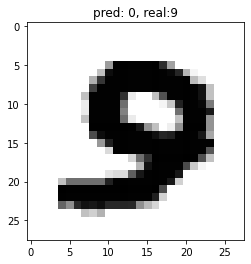

========== [idx : 605] ==========
[0.   0.   0.   0.03 0.   0.   0.   0.18 0.   0.79]


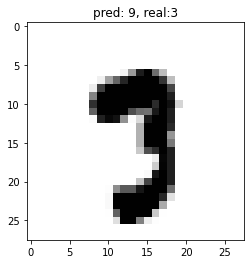

========== [idx : 672] ==========
[0.01 0.   0.63 0.02 0.   0.19 0.   0.02 0.12 0.03]


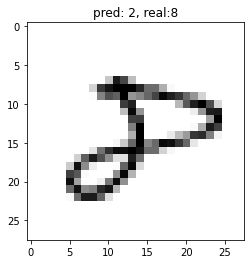

========== [idx : 686] ==========
[0.   0.   0.02 0.   0.29 0.   0.68 0.   0.01 0.  ]


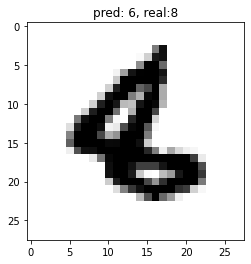

========== [idx : 699] ==========
[0.   0.   0.02 0.73 0.   0.04 0.   0.   0.03 0.18]


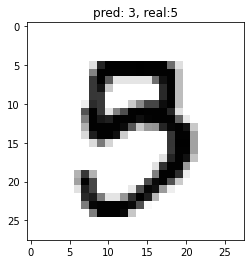

========== [idx : 755] ==========
[0.   0.   0.   0.   0.   0.73 0.08 0.   0.19 0.  ]


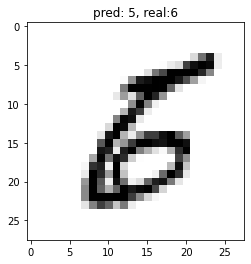

========== [idx : 777] ==========
[0.   0.51 0.03 0.   0.   0.   0.   0.46 0.   0.  ]


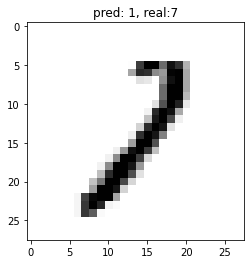

========== [idx : 789] ==========
[0.   0.02 0.61 0.14 0.   0.   0.   0.23 0.   0.  ]


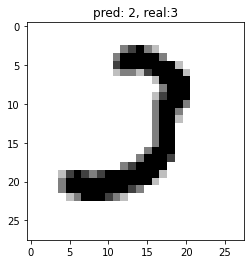

========== [idx : 830] ==========
[0.01 0.   0.   0.   0.   0.   0.88 0.   0.11 0.  ]


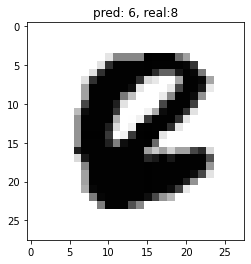

========== [idx : 840] ==========
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


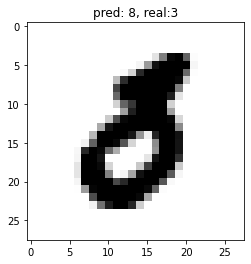

========== [idx : 852] ==========
[0.26 0.48 0.01 0.   0.23 0.   0.   0.   0.01 0.01]


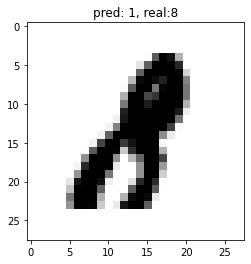

========== [idx : 858] ==========
[0.   0.01 0.01 0.1  0.   0.16 0.   0.69 0.   0.04]


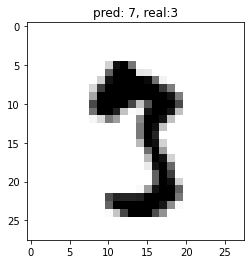

========== [idx : 903] ==========
[0.02 0.   0.04 0.   0.   0.05 0.   0.56 0.   0.33]


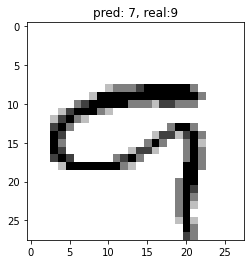

========== [idx : 940] ==========
[0.   0.   0.35 0.22 0.25 0.05 0.   0.01 0.09 0.02]


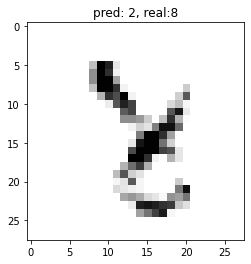

========== [idx : 1043] ==========
[0.   0.   0.   0.   0.38 0.   0.   0.   0.   0.61]


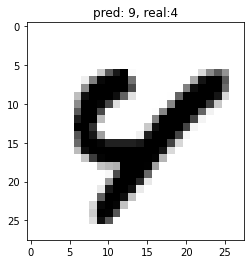

In [27]:
# 예측이 틀린 데이터 20개만 가져와서 확인해 보기

for i in false_idx_list[:20] :
    print(f'========== [idx : {i}] ==========')
    target_prob = y_prob[i]
    target_pred = target_prob.argmax()
    target_real = y_val[i]
    print(target_prob.round(2))
    plt.imshow(X_val[i].reshape(28,28), cmap = 'binary')
    plt.title(f'pred: {target_pred}, real:{target_real}')
    plt.show()